In [45]:
from collections import defaultdict

import pandas as pd
import json

# Initialize list to store parsed JSON objects
data_list = []
id_scores = defaultdict(list)

ip_names = {
    '86.49.251.194': 'statista',
    '82.144.132.167': 'pribyl',
    'eichler': 'eichler',
    'dkazyo': 'dkazyo'
}

with open('../user-preferences.jsonl', 'r') as jsonlines_file:
    for id_line, line in enumerate(jsonlines_file):
        sample = json.loads(line)
        sample['dialogue_id'] = int(sample['dialogue_id'])
        try: 
            sample['ip'] = sample['header']['X-Forwarded-For']
        except KeyError:
            if id_line < 11:
                sample['ip'] = 'eichler'
            elif id_line < 15:
                sample['ip'] = 'dkazyo'
            else:
                raise KeyError('No IP address found in JSON object')
        
        sample['ip'] = ip_names[sample['ip']]
        
        try:
            del sample['header']
        except KeyError:
            pass
    
        id_scores[int(sample['dialogue_id'])].append(
            {
                'person': sample['ip'],
                'score': sample['preference']
            }
        )
        
        data_list.append(sample)




# Create DataFrame from the list of parsed JSON objects
df = pd.DataFrame(data_list)

df

,dialogue_id,preference,time,took_seconds,ip
0,0,GPT-slightly,2024-09-30 10:58:41.426589,324.980631,eichler
1,37,GT,2024-09-30 11:00:37.483796,116.056214,eichler
2,21,GPT-slightly,2024-09-30 13:11:16.968941,135.357586,eichler
3,4,None,2024-09-30 13:12:46.927997,89.958267,eichler
4,24,Both,2024-09-30 13:13:03.445545,16.516372,eichler
5,15,None,2024-09-30 13:17:56.427363,275.489943,eichler
6,12,GPT-slightly,2024-09-30 13:21:20.457002,26.412574,eichler
7,41,GT-slightly,2024-09-30 13:23:30.614573,130.156581,eichler
8,10,GPT-slightly,2024-09-30 13:25:23.160249,112.544680,eichler
9,18,Both,2024-09-30 13:25:45.944629,22.783496,eichler


In [46]:
preference_scores = {
    'GPT': 1,
    'GPT-slightly': 2,
    'None': 3,
    'GT-slightly': 4,
    'GT': 5,
    'Both': 10
}

df['preference_score'] = df['preference'].map(preference_scores)
df


,dialogue_id,preference,time,took_seconds,ip,preference_score
0,0,GPT-slightly,2024-09-30 10:58:41.426589,324.980631,eichler,2
1,37,GT,2024-09-30 11:00:37.483796,116.056214,eichler,5
2,21,GPT-slightly,2024-09-30 13:11:16.968941,135.357586,eichler,2
3,4,None,2024-09-30 13:12:46.927997,89.958267,eichler,3
4,24,Both,2024-09-30 13:13:03.445545,16.516372,eichler,10
5,15,None,2024-09-30 13:17:56.427363,275.489943,eichler,3
6,12,GPT-slightly,2024-09-30 13:21:20.457002,26.412574,eichler,2
7,41,GT-slightly,2024-09-30 13:23:30.614573,130.156581,eichler,4
8,10,GPT-slightly,2024-09-30 13:25:23.160249,112.544680,eichler,2
9,18,Both,2024-09-30 13:25:45.944629,22.783496,eichler,10


<Axes: xlabel='preference', ylabel='count'>

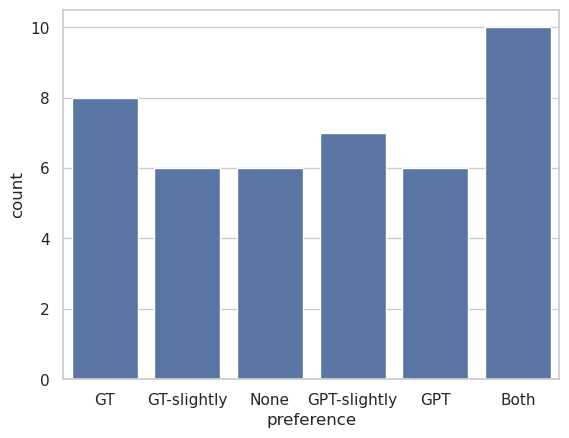

In [47]:
import seaborn as sns

sns.set_theme(style='whitegrid')
sns.countplot(data=df, x='preference', order=['GT', 'GT-slightly', 'None', 'GPT-slightly', 'GPT', 'Both'])

In [48]:
id_scores = {k: id_scores[k] for k in sorted(id_scores)}
id_scores

{0: [{'person': 'eichler', 'score': 'GPT-slightly'},
  {'person': 'statista', 'score': 'GT'}],
 2: [{'person': 'statista', 'score': 'Both'},
  {'person': 'statista', 'score': 'None'}],
 4: [{'person': 'eichler', 'score': 'None'}],
 6: [{'person': 'dkazyo', 'score': 'GPT-slightly'}],
 10: [{'person': 'eichler', 'score': 'GPT-slightly'},
  {'person': 'dkazyo', 'score': 'GPT-slightly'},
  {'person': 'pribyl', 'score': 'GPT'}],
 11: [{'person': 'statista', 'score': 'GPT'},
  {'person': 'statista', 'score': 'None'}],
 12: [{'person': 'eichler', 'score': 'GPT-slightly'}],
 14: [{'person': 'statista', 'score': 'GT-slightly'},
  {'person': 'statista', 'score': 'None'}],
 15: [{'person': 'eichler', 'score': 'None'},
  {'person': 'statista', 'score': 'GT'}],
 17: [{'person': 'pribyl', 'score': 'GT-slightly'}],
 18: [{'person': 'eichler', 'score': 'Both'},
  {'person': 'statista', 'score': 'GPT'}],
 21: [{'person': 'eichler', 'score': 'GPT-slightly'}],
 23: [{'person': 'statista', 'score': 'GT-sl

In [49]:
id_scores = {k: id_scores[k] for k in sorted(id_scores) if len(id_scores[k]) > 1}
id_scores

{0: [{'person': 'eichler', 'score': 'GPT-slightly'},
  {'person': 'statista', 'score': 'GT'}],
 2: [{'person': 'statista', 'score': 'Both'},
  {'person': 'statista', 'score': 'None'}],
 10: [{'person': 'eichler', 'score': 'GPT-slightly'},
  {'person': 'dkazyo', 'score': 'GPT-slightly'},
  {'person': 'pribyl', 'score': 'GPT'}],
 11: [{'person': 'statista', 'score': 'GPT'},
  {'person': 'statista', 'score': 'None'}],
 14: [{'person': 'statista', 'score': 'GT-slightly'},
  {'person': 'statista', 'score': 'None'}],
 15: [{'person': 'eichler', 'score': 'None'},
  {'person': 'statista', 'score': 'GT'}],
 18: [{'person': 'eichler', 'score': 'Both'},
  {'person': 'statista', 'score': 'GPT'}],
 23: [{'person': 'statista', 'score': 'GT-slightly'},
  {'person': 'statista', 'score': 'GT-slightly'}],
 28: [{'person': 'statista', 'score': 'Both'},
  {'person': 'pribyl', 'score': 'Both'}],
 30: [{'person': 'statista', 'score': 'Both'},
  {'person': 'statista', 'score': 'Both'}],
 34: [{'person': 'eic

In [53]:
def filter_person(person, vals):
    return  [val['score'] for val in vals if val['person'] == person]

for k, vals in id_scores.items():
    pp = []
    for val in vals:
        if val['person'] in pp:
            if val['person'] == 'statista':
                print(f"Duplicate person in dialogue {k}: {val['person']}")
                print("\t - ", filter_person(val['person'], vals))
        pp.append(val['person'])
        

Duplicate person in dialogue 2: statista
	 -  ['Both', 'None']
Duplicate person in dialogue 11: statista
	 -  ['GPT', 'None']
Duplicate person in dialogue 14: statista
	 -  ['GT-slightly', 'None']
Duplicate person in dialogue 23: statista
	 -  ['GT-slightly', 'GT-slightly']
Duplicate person in dialogue 30: statista
	 -  ['Both', 'Both']
Duplicate person in dialogue 37: statista
	 -  ['GT', 'GT']


<Axes: ylabel='took_seconds'>

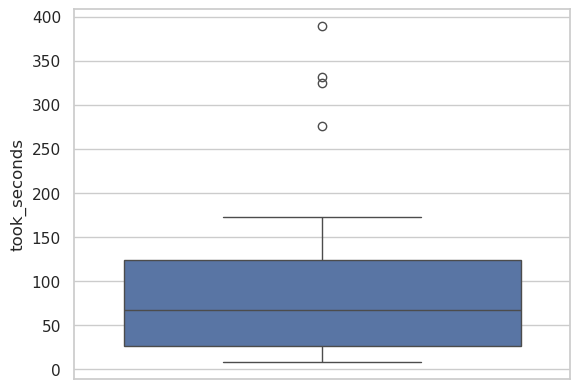

In [50]:
df.loc[df['took_seconds'] > 500, 'took_seconds'] = None
seconds = df['took_seconds']

sns.boxplot(data=df['took_seconds'])